In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def standardize_data (x):
    mean = np.mean(x,axis=0)
    #std = np.std(x,axis=0)
    x_standard = (x-mean)
    return x_standard

In [3]:
def compress_and_decompressed_image(image, k):
    # standardize data
    image = standardize_data(image)
   
    # Calculate the covariance matrix
    covariance_matrix = np.cov(image)
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top-k eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]
    
    # Project image onto the selected eigenvectors
    compressed_image = np.dot(selected_eigenvectors.T, image)
    
    # Decompressed the compressed image
    decompressed_image = np.dot(selected_eigenvectors, compressed_image)
    
    # Reshape the reconstructed image to the original dimensions
    decompressed_image = decompressed_image.reshape(image.shape)
    
    return compressed_image, decompressed_image

In [10]:
image = Image.open('dog.jpg').convert('L') # load image and convert it into gray scale image 

image_array = np.array(image) # convert image into numpy array
print('Image shape : ' , image_array.shape)

# Set the number of components to retain (k)
k =500
print('K = ' , k)
# Apply PCA algorithm
compressed_image, decompressed_image = compress_and_decompressed_image(image_array, k)

Image shape :  (3888, 5184)
K =  500


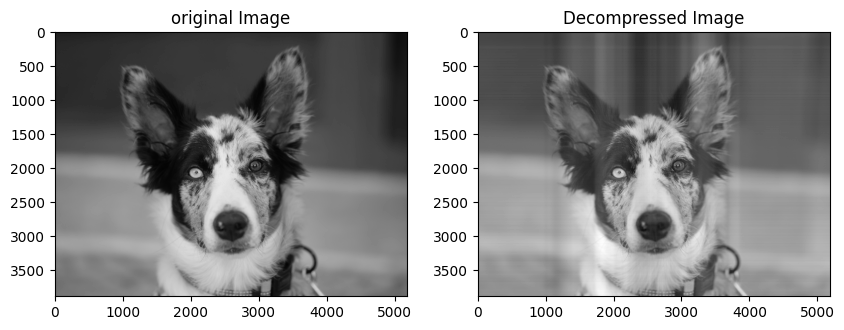

In [11]:
# Visualize the compressed and decompressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#axs[0].imshow(compressed_representation.reshape(-1,1), cmap='gray')
axs[0].imshow(image_array, cmap='gray')
axs[0].set_title('original Image')

axs[1].imshow(decompressed_image, cmap='gray')
axs[1].set_title('Decompressed Image')
plt.show()

Text(0.5, 1.0, 'compressed image')

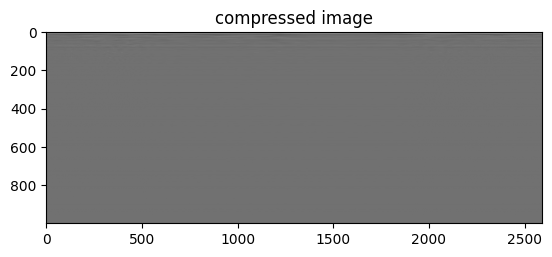

In [13]:
plt.imshow(compressed_image.reshape(1000,2592),cmap='gray')
plt.title('compressed image')